In [57]:
# #Install Kaggle and API
# #https://medium.com/@yvettewu.dw/tutorial-kaggle-api-google-colaboratory-1a054a382de0
# pip install --jon kaggle
# #API: kaggle competitions download -c titanic
# !pip install kaggle
# !mkdir .kaggle
# import json
# token = {"username":"cheoalee","key":"90feadfa6114f72c7a0e119e106baa44"}
# with open('/content/.kaggle/kaggle.json', 'w') as file:
#     json.dump(token, file)
# !chmod 600 /content/.kaggle/kaggle.json
# !kaggle competitions download -c titanic -p /Users/Home_AL/Downloads/kaggle.json

#Useful DSS Libraries
import pandas as pd
import numpy as np
import seaborn as sns

#Copied from EE16B
import scipy as sp

# Copied from Data8
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# train.csv and test.csv

In [58]:
# import train.csv
train_df = pd.read_csv("train.csv")
train_df.info()

# FOR QUIZ:
#  drop passengerid, ticket, name
#  cabin exchanged for deck
#  Name input omitted for privacy
#  Pclass: 1 to 3
#  Sex: Male or Female sry
#  Age: 0- 11, 11-18, 18-22, 22-27, 27-33, 33-40, 40-66, 66+dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
#  Sibsp: 0-8
#  Parch: 0-6
#  Fare: 30-210, 210-380, 380-815, 815-2600, 2600-6500, 6500+
#  Cabin: A-G
#  Embared: Cherbourg-Octeville, France, Queenstown, Ireland, Southampton, UK
 
# import test.csv
test_df = pd.read_csv("test.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [59]:
train_df.describe()
train_df["Parch"].max()

6

In [60]:
#What's missing?
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


/Users/jon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


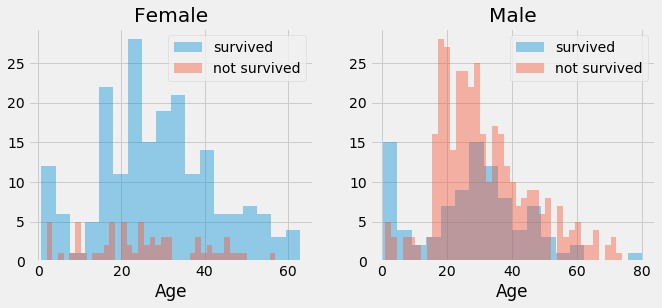

In [61]:
# Graph survival: age
# Seaborn: seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

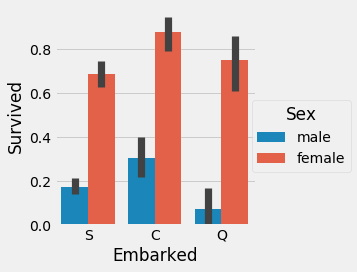

In [62]:
# Graph survival: embarkment location
sns.factorplot(x='Embarked', y='Survived', hue='Sex', data=train_df, kind='bar')

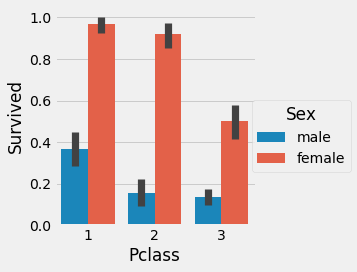

In [63]:
# Graph survival: class
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=train_df, kind='bar')

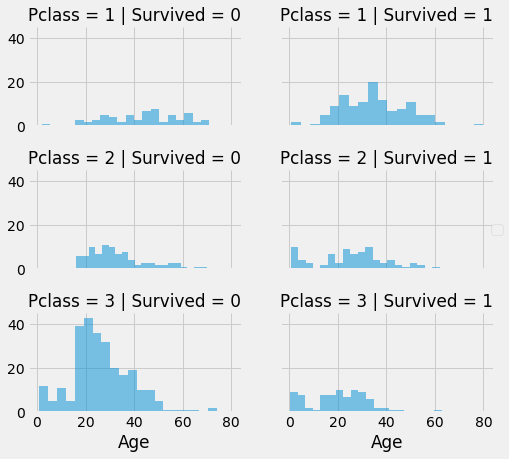

In [64]:
# A closer look at survival by class
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [65]:
# Graph survival: relatives
data = [train_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

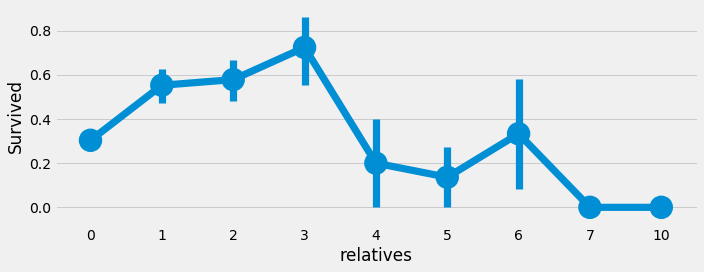

In [66]:
# A closer look at survival by relatives
axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, )

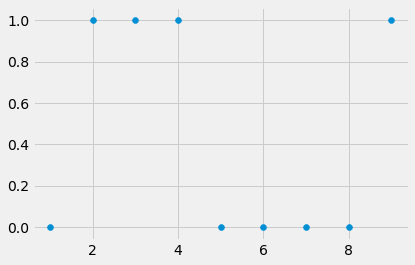

In [67]:
# small scale to show it works
ten_set = train_df[train_df['PassengerId']<10]
plt.scatter(ten_set['PassengerId'], ten_set['Survived'])

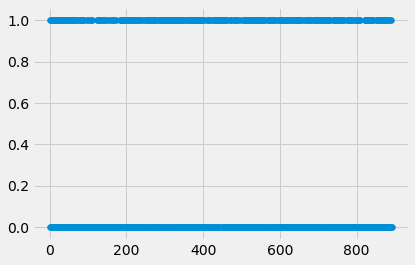

In [68]:
# whole set
plt.scatter(train_df['PassengerId'], train_df['Survived'])

In [69]:
# Therefore, we assume PassengerId is not correlated with survival. We will drop it from the data set.
train_df.info()
train_df = train_df.drop(['PassengerId'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
relatives      891 non-null int64
not_alone      891 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 97.5+ KB


In [70]:
#Filling in Missing Data

In [71]:
# Cabin
#  Letters in front of number refer to deck; i.e. "B123" refers to Deck B.
#  Convert letters to numbers for usage.
#  Create new category called deck.
#  Missing values filled in with 0.
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data_count = 0
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    if data_count == 0:
      train_df = dataset
    else:
      test_df = dataset
    data_count += 1

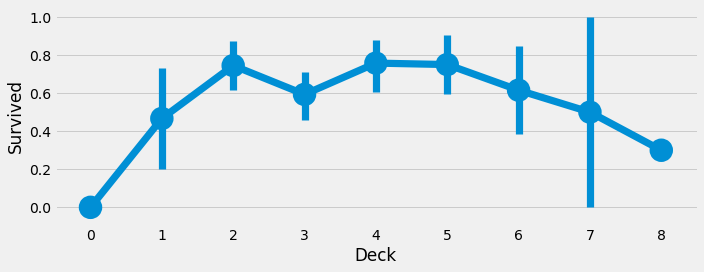

In [72]:
# A look at the correlation between deck and survival
axes = sns.factorplot(x='Deck',y='Survived', 
                      data=train_df, aspect = 2.5, )

In [73]:
# Now that we have deck, drop original "Cabin" column.
train_df = train_df.drop(['Cabin'], axis=1)

In [74]:
train_df.groupby(['Embarked']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,relatives,not_alone,Deck
Embarked,,,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,168,168,168
Q,77,77,77,77,77,28,77,77,77,77,77,77,77
S,644,644,644,644,644,554,644,644,644,644,644,644,644


In [75]:
# Embarkment
#  2 values missing
#  Fill in with most common value

most_common_embarkment = 'S'

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(most_common_embarkment)

In [76]:
# Age
  # REPLACE THIS WITH OUR OWN METHOD
  # just used the one from the tutorial for now
  
# Filling in the missing ages
dataset = pd.read_csv("train.csv")
np.random.seed(seed=None)
list_of_titles = [' Mlle. ', ' Ms. ', ' Mme. ', ' Miss. ',' Mrs. ',' Mr. ', ' Lady. ', ' Countess. ',' Capt. ', ' Col. ',' Don. ', ' Dr. ', ' Major. ', ' Rev. ', ' Sir. ', ' Jonkheer. ', ' Master. ']
titles = np.array([])
names_array = dataset['Name'].values
for name in names_array:
    counter = 0
    for title in list_of_titles:
        try:
            name.index(title)
            titles = np.append(titles, title)
        except:
            counter += 1
        if counter == 17:
            print(name)
ages = dataset['Age']
titles_and_ages = np.stack((titles, ages), axis=-1)
total_sum = np.zeros(17)
num_titles = np.zeros(17)
for pair in titles_and_ages:
    counter = 0
    for title in list_of_titles:
        if title == pair[0]:
            if pair[1] != 'nan':
                total_sum[counter] += float(pair[1])
                num_titles[counter] += 1
        counter += 1
averages = total_sum/num_titles
average_age_of_title_tbl = pd.DataFrame(data = {'Title': list_of_titles, 'Average Age': averages})
std_deviations = np.array([])
for title in list_of_titles:
    current_title_ages = np.array([])
    for pair in titles_and_ages:
        if title == pair[0]:
            if pair[1] != 'nan':
                current_title_ages = np.append(current_title_ages, float(pair[1]))
    std_deviations = np.append(std_deviations, np.std(current_title_ages))
augmented_table = pd.DataFrame(data = {'Title': list_of_titles, 'Average Age': averages, 'Standard Deviations': std_deviations})
augmented_table
original_ages = dataset['Age'].values
age_index = 0
person_index = 0
for age in original_ages:
    if np.isnan(age):
        for title in list_of_titles:
            if titles[person_index] == title:
                mean = augmented_table.loc[augmented_table['Title'] == title].values.item(1)
                std = augmented_table.loc[augmented_table['Title'] == title].values.item(2)
                if std != 0:
                    rand_age = np.random.randint(mean - std, mean + std)
                    original_ages[age_index] = rand_age
                else:
                    original_ages[age_index] = mean
    person_index += 1
    age_index += 1
dataset.Age = original_ages
data[0] = dataset
train_df = dataset


In [77]:
std

12.945728680446788

In [78]:
# CONVERTING FEATURES
# Fare, Name, Sex, Ticket, Embarked

In [79]:
# Fare
#  Convert from float to int
#  Fill missing values with 0
data_count = 0
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    if data_count == 0:
      train_df = dataset
    else:
      test_df = dataset
    data_count += 1

In [80]:
# Sex
#  Convert into numeric values
genders = {"male": 0, "female": 1}
data_count = 0
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
    if data_count == 0:
      train_df = dataset
    else:
      test_df = dataset
    data_count += 1

In [81]:
# Ticket
#  REPLACE WITH OUR OWN METHOD
#  for now, drop
train_df = train_df.drop(['Ticket'], axis=1)


In [82]:
# Embarked
#  Replace ports with numbers
ports = {"S": 0, "C": 1, "Q": 2}
data_count = 0
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    if data_count == 0:
      train_df = dataset
    else:
      test_df = dataset
    data_count += 1

In [83]:
# Create categories
# for now, age and fare
#  REPLACE WITH OUR OWN METHOD
#  customize

In [84]:
# age
data_count = 0
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
    if data_count == 0:
      train_df = dataset
    else:
      test_df = dataset
    data_count += 1

# to see how its distributed
# train_df['Age'].value_counts()

In [85]:
# fare

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    train_df = dataset

In [86]:
# CREATE NEW FEATURES
# customize
# REPLACE WITH OUR OWN METHOD
# tutorial did age * class and fare/person

In [87]:
# BUILD MACHINE LEARNING MODELS
# 8 models tested: SGD, Random Forest, Logistic regression, K nearest neighbor,
# Gaussian Native Bayes, Perceptron, Linear Support Vector Machine, Decision Tree
# Which is best?

In [88]:
pd.isnull(train_df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [122]:
dataset = train_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"]).dropna()

dataset.to_csv(r'cleaned_data.csv')


In [90]:
dataset = pd.read_csv("cleaned_data.csv")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=["Survived"]), 
                                                    dataset["Survived"], 
                                                    test_size=0.10, random_state=0)

In [91]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_forest = RandomForestClassifier()
random_rf = RandomizedSearchCV(estimator=random_forest,param_distributions=random_grid,
                              n_iter=100,cv=3,verbose=2, random_state=1, n_jobs=-1)
random_rf.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   45.5s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [98]:
random_rf.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [96]:
grid_search.best_params_
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Random Forest

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 120],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [200, 300, 400, 500, 600]
}
random_forest = RandomForestClassifier()
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid,
                          cv=3,n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 183 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 1034 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110, 120], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [4, 5, 6], 'n_estimators': [200, 300, 400, 500, 600]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [102]:
grid_search.best_params_
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=120, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
# random_forest = RandomForestClassifier(n_estimators=1000, max_depth=50, min_samples_leaf=50)
# random_forest.fit(X_train, y_train)

# Y_prediction = random_forest.predict(X_test)

#random_forest.score(X_train, y_train)

#acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
grid_search.best_params_
best_grid = grid_search.best_estimator_
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=60, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=1800, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
random_forest.fit(X_train, y_train)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

74.16

In [101]:
#INPUT USER DATA


696    0
517    0
367    1
312    0
531    0
838    1
264    0
591    1
680    0
507    1
383    1
476    0
151    1
570    1
887    1
201    0
670    1
267    1
429    1
284    0
215    1
380    1
387    1
733    0
142    1
176    0
587    1
495    0
643    1
5      0
      ..
73     0
847    0
538    0
678    0
851    0
874    1
175    0
88     1
552    0
487    0
706    1
315    1
397    0
601    0
473    1
71     0
600    1
805    0
755    1
278    0
724    1
9      1
360    0
708    1
764    0
837    0
193    1
630    1
560    0
685    0
Name: Survived, Length: 800, dtype: int64

In [324]:
# Stochastic Gradient Descent (SGD)
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_test, y_test)

acc_sgd = round(sgd.score(X_test, y_test) * 100, 2)

In [325]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)

In [326]:
 # Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_test, y_test) * 100, 2)

In [327]:
# K nearest neighbor
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)

In [328]:
# Gaussian Native Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)


In [329]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_test, y_test) * 100, 2)

In [330]:
# Linear Support Vector Machine
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_test, y_test) * 100, 2)

/Users/jon/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [331]:
# Test for best model
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
74.16,Random Forest
71.91,Decision Tree
67.42,Support Vector Machines
67.42,KNN
66.29,Logistic Regression
65.17,Naive Bayes
50.56,Stochastic Gradient Decent
41.57,Perceptron


In [44]:
# # variables: training set 1, results 1, test set
# original_train_df = train_df.drop('Name', axis=1).drop('Ticket', axis=1).drop('Cabin', axis = 1)
# original_train_df = original_train_df.drop(61, axis=0)
# original_train_df = original_train_df.drop(829, axis=0)
# train_df = original_train_df.drop(np.arange(61), axis=0).drop(np.arange(62, 90), axis=0)
# test_df = original_train_df.drop(np.arange(90,829), axis=0).drop(np.arange(830, 891), axis=0)
# X_train = train_df.drop("Survived", axis=1)
# Y_train = train_df["Survived"]
# X_test  = test_df.drop("Survived", axis=1).copy()
# X_test

In [45]:
# X_train

In [46]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

NameError: name 'Y_train' is not defined

In [0]:
 # Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [0]:
# K nearest neighbor
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [0]:
# Gaussian Native Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)


In [0]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [787]:
# Linear Support Vector Machine
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [110]:
# Test for best model
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

NameError: name 'acc_linear_svc' is not defined

In [790]:
# CROSS VALIDATION
#  Using K-fold cross validation
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.74074074 0.79012346 0.7375     0.8875     0.825      0.85
 0.8375     0.7875     0.79746835 0.83544304]
Mean: 0.8088775589935928
Standard Deviation: 0.045092919119358976


In [0]:
# Thus, we use the Random Forest Algorithm.

In [105]:
# Let's train it by figuring out which features are and are not important.
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.482
Pclass,0.161
Fare,0.107
Age,0.105
SibSp,0.067
Embarked,0.040
Parch,0.038


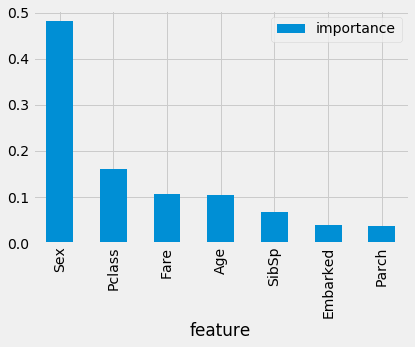

In [106]:
importances.plot.bar()

In [108]:
# not_alone and Parch are not very significant. Let's drop them and train
# the classifier again.
# train_df  = train_df.drop("not_alone", axis=1)
# test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

NameError: name 'Y_train' is not defined

In [109]:
# Evaluation
# ROC AUC Curve
# This curve plots the true positive rate (also called recall) against the false
# positive rate (ratio of incorrectly classified negative instances), instead of
# plotting the precision versus the recall.

y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [796]:
# ROC AUC Score
# he ROC AUC Score is the corresponding score to the ROC AUC Curve.
# It is simply computed by measuring the area under the curve, which is called AUC.
# A classifiers that is 100% correct, would have a ROC AUC Score of 1
# and a completely random classiffier would have a score of 0.5.

from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 1.0
